# DATA ANALYSIS AND DATA SCIENCE USING PYTHON
## TASK - 3
### Task 3: Clustering Analysis – Customer Segmentation


##### 1. Importing Required Libraries 

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
data = pd.read_csv("C:\\Users\\pradi\\Downloads\\customers_data.csv")
data.head(7)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6


In [21]:
data.shape

(200, 5)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


##### Our data has 200 rows with 5 features 
##### And it contains integer and string type data

In [23]:
## summary statisitcs 
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [24]:
## Chekcing for null values 
check_null_val = data.isnull().sum()
print("no. of null values: ",check_null_val)

no. of null values:  CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [25]:
## Checking for duplicated values 
data_duplicate =data.duplicated().sum()
print("dupicatedd values are: ",data_duplicate)

dupicatedd values are:  0


## 2. Data Preprocessing



In [26]:
## Standardizing the data 
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [28]:
# Drop CustomerID as it not useful for clustering 
data.drop(columns=["CustomerID"], inplace=True)

In [29]:
# Encoding Gender column as its object type data 
label_encoder = LabelEncoder()
data["Gender"] = label_encoder.fit_transform(data["Gender"])


##### -- Gender column is encoded (Male = 1, Female = 0) for possible usage

In [30]:
## now we standardizing numerical type data columns important fro clustering 
## so we first selectnumerical columns
numerical_cols = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]


In [31]:
## Standardized dataset
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])


##### -- standardization will ensure that high income customers shoud not dominate in clusteing 

In [32]:
## so preprocessed dataset
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,-1.424569,-1.738999,-0.434801
1,1,-1.281035,-1.738999,1.195704
2,0,-1.352802,-1.700830,-1.715913
3,0,-1.137502,-1.700830,1.040418
4,0,-0.563369,-1.662660,-0.395980


### Clustering

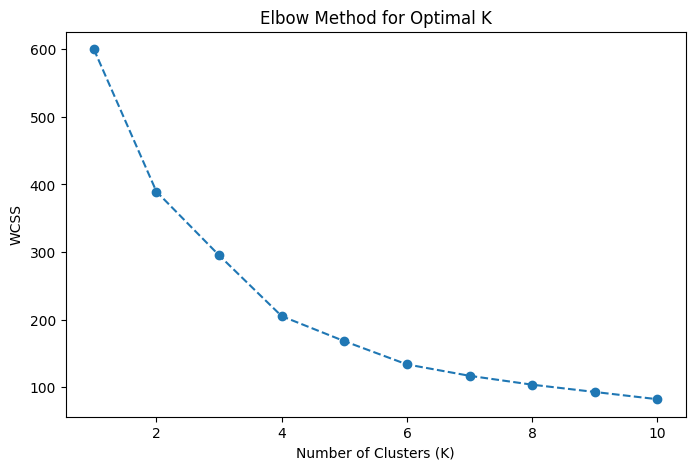

In [34]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Elbow Method to find optimal k
wcss = []
K = range(1, 11)  # Testing k from 1 to 10
## Applying k means clustering algorithm
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data[numerical_cols])
    wcss.append(kmeans.inertia_)  # Sum of squared distances to closest cluster center

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K, wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()


##### -- we could observ that five clusters are optimal for segmneting the customers 

In [37]:
##silhouette_scores
silhouette_scores = {}

for k in range(2, 11):  # Silhouette is not defined for k=1
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data[numerical_cols])
    silhouette_scores[k] = silhouette_score(data[numerical_cols], labels)

# Print silhouette scores
print("\nSilhouette Scores:\n", silhouette_scores)



Silhouette Scores:
 {2: 0.33547192894004574, 3: 0.357793388710272, 4: 0.4039582785148566, 5: 0.41664341513732767, 6: 0.4284167762892593, 7: 0.417231894954916, 8: 0.4082067042807375, 9: 0.41769250624076476, 10: 0.40655411010117015}


## Applying k-means clusteing 

In [38]:
# Apply K-Means with optimal clusters (replace 5 with your chosen k)
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
data["Cluster"] = kmeans.fit_predict(data[numerical_cols])


In [39]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,-1.424569,-1.738999,-0.434801,1
1,1,-1.281035,-1.738999,1.195704,1
2,0,-1.352802,-1.700830,-1.715913,0
3,0,-1.137502,-1.700830,1.040418,1
4,0,-0.563369,-1.662660,-0.395980,1


### key findings--
##### -as we can see from cluster1 that customer having low income has low spending stategies should be budget friendly.
##### -and custimer in cluster4 have high inlcome so spending is also high so they may prefer premium brands. 

# Visualization

### 2D ScatterPlot

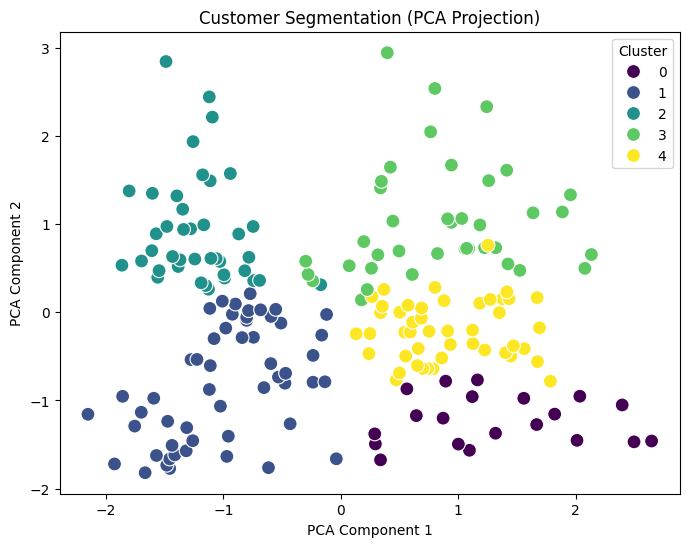

In [43]:
import seaborn as sns
from sklearn.decomposition import PCA

# Reduce to 2D for visualization
pca = PCA(n_components=2)
data["PCA1"], data["PCA2"] = zip(*pca.fit_transform(data[numerical_cols]))

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x="PCA1", y="PCA2", hue="Cluster", palette="viridis", s=100)
plt.title("Customer Segmentation (PCA Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


### Pair Plot for Feature Relationships 

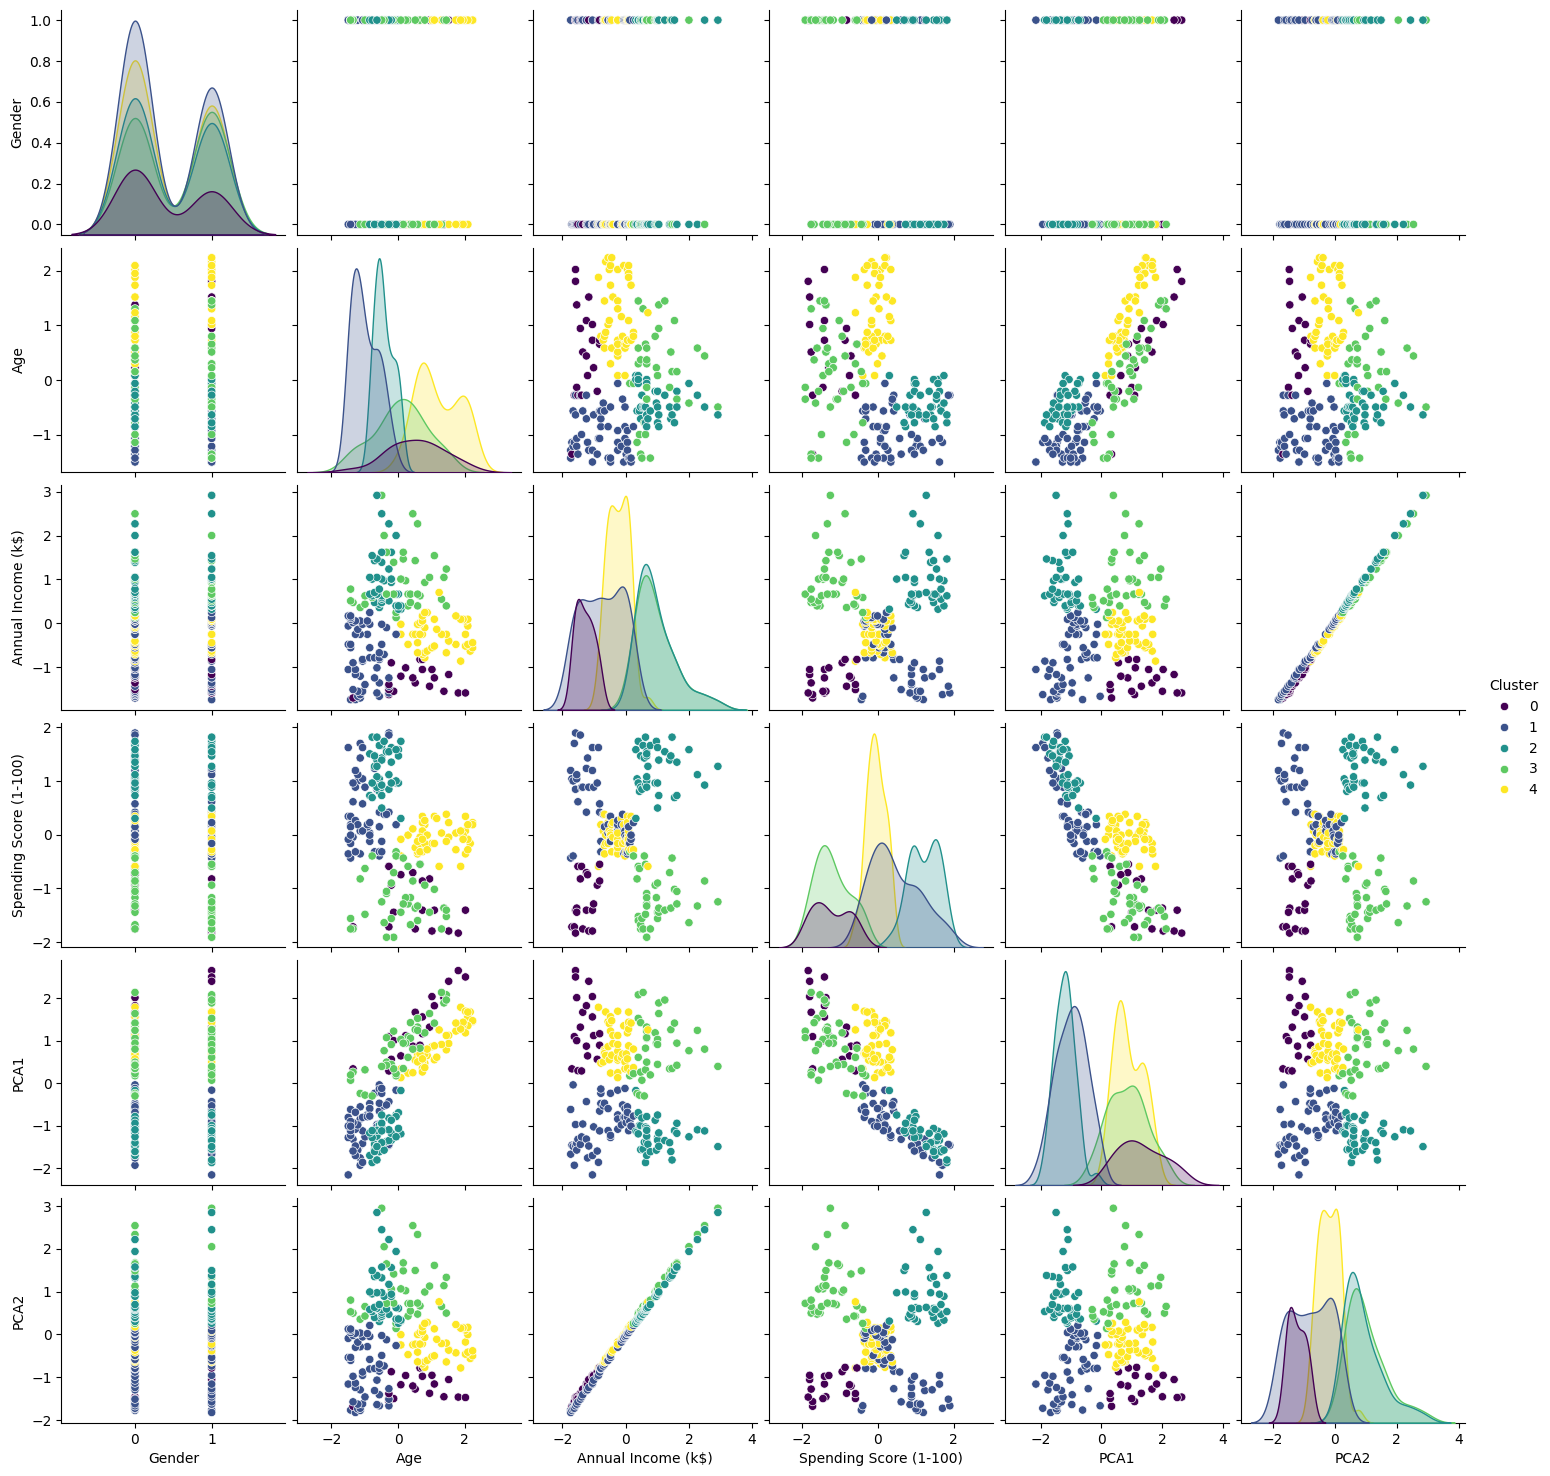

In [45]:
sns.pairplot(data, hue="Cluster", palette="viridis")
plt.show()


### Conclusion:
##### This customer segmentation analysis using K-Means clustering helps businesses create highly targeted marketing strategies. By identifying different customer personas, companies can enhance customer experience, increase revenue, and optimize marketing budgets accordingly. 